# Communicate-Data-Findings-Ford-GoBike-System
## by Mohamed Abdelkader

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area..

In [246]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [247]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [248]:
df.head(8)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No


- where latitude is a geographic coordinate that specifies the north–south position of a point on the Earth's surface.
- where Longitude, is a geographic coordinate that specifies the east–west position of a point on the Earth's surface .
- A customer has purchased one product from you. They may never purchase another. A subscriber has purchased an ongoing commitment for a product with you. 
- the data contains a column called "bike_share_for_all_trip", which tracks members who are enrolled in the Bike Share for All program for low-income residents.

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### there are Empty cells .. and features data types not appropriate for all variables.

In [251]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

##### start_station_id  start_station_name  end_station_id  end_station_name has  197 nulls  
##### member_birth_year  member_gender  has  8265 nulls

In [252]:
df.shape

(183412, 16)

In [253]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

### What is the structure of your dataset?

> 16 features of 183412 records .<br> 
<br> 
duration_sec                 int64<br> 
start_time                  object<br> 
end_time                    object<br> 
start_station_id           float64<br> 
start_station_name          object<br> 
start_station_latitude     float64<br> 
start_station_longitude    float64<br> 
end_station_id             float64<br> 
end_station_name            object<br> 
end_station_latitude       float64<br> 
end_station_longitude      float64<br> 
bike_id                      int64<br> 
user_type                   object<br> 
member_birth_year          float64<br> 
member_gender               object<br> 
bike_share_for_all_trip     object<br> 
<br> 
where int64 float64 are Numeric variables and object is String ( categorical ).

### What is/are the main feature(s) of interest in your dataset?

> member_birth_year,duration_sec, member_gender, user_type, start_station_id, end_station_id, bike_share_for_all_trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec where it can be related to gender and age <br> 
> start_time, end_time where it can affect duration cause of traffic 

- please notice that some main features may affect other main features where are binding in same system.

# Cleaning Data

In [254]:
# first we will make a copy before cleaning cause me we use original data again 
ford_bike = df.copy()

In [255]:
#Removing useless features from the dataset for better analysis
df.drop([ 'end_station_latitude', 'end_station_longitude','start_station_latitude','bike_id','start_station_longitude'], axis=1, inplace=True)
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No


In [256]:
# Change data type start_time end_time from object to datetime.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [257]:
# change duration_sec to duration in minutes to be like daily used data by people
df['duration_sec'] = df['duration_sec']/60
df.rename(columns= {"duration_sec":"duration_min"}, inplace = True ) 

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_min             183412 non-null  float64       
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183215 non-null  float64       
 6   end_station_name         183215 non-null  object        
 7   user_type                183412 non-null  object        
 8   member_birth_year        175147 non-null  float64       
 9   member_gender            175147 non-null  object        
 10  bike_share_for_all_trip  183412 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 15.4+ MB


In [259]:
# drop nulls where sum of nulls number is small number number comparaple to affecting our 183412 data badly 
df.dropna(inplace=True)

In [260]:
df.isnull().sum()

duration_min               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [261]:
#check duplicates
df.duplicated().sum()

0

- ###### No nulls or duplicates

In [262]:
df.describe()

,duration_min,start_station_id,end_station_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000
mean,11.733379,139.002126,136.604486,1984.803135
std,27.370082,111.648819,111.335635,10.118731
min,1.016667,3.000000,3.000000,1878.000000
25%,5.383333,47.000000,44.000000,1980.000000
50%,8.500000,104.000000,101.000000,1987.000000
75%,13.150000,239.000000,238.000000,1992.000000
max,1409.133333,398.000000,398.000000,2001.000000


- born year to be 1878 is soo old and must be droped 

In [263]:
df[df.member_birth_year == 1878]

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,24.566667,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15.0,San Francisco Ferry Building (Harry Bridges Pl...,386.0,24th St at Bartlett St,Customer,1878.0,Female,No


In [264]:
df.drop(27370,axis = 0 , inplace = True)

In [265]:
df.describe()

,duration_min,start_station_id,end_station_id,member_birth_year
count,174951.000000,174951.000000,174951.000000,174951.000000
mean,11.733306,139.002835,136.603060,1984.803745
std,27.370143,111.648744,111.334357,10.115538
min,1.016667,3.000000,3.000000,1900.000000
25%,5.383333,47.000000,44.000000,1980.000000
50%,8.500000,104.000000,101.000000,1987.000000
75%,13.150000,239.000000,238.000000,1992.000000
max,1409.133333,398.000000,398.000000,2001.000000


- Ages still upnormal , I think if someone older than 90 won't ride a bike so I will drop Age > 90 

In [266]:
# Age of people > 90 where this data set is at 2019 as it's csv file name starts with 2019
Age_90 = 2019 - 90
Age_90

1929

In [292]:
Age_90plus = df[(df.member_birth_year < 1929)]
Age_90plus

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,start_month,start_Weak_day,start_hour


- 76 rows of users above 90 years old and that hard to find such old person using bike so I think it's false in data and I will drop them .

In [268]:
df.drop(df[(df.member_birth_year < 1929 )].index, inplace = True)

In [269]:
df.describe()

,duration_min,start_station_id,end_station_id,member_birth_year
count,174875.000000,174875.000000,174875.000000,174875.000000
mean,11.733800,138.981141,136.604655,1984.839726
std,27.375632,111.637185,111.333687,9.968641
min,1.016667,3.000000,3.000000,1930.000000
25%,5.383333,47.000000,44.000000,1980.000000
50%,8.500000,104.000000,101.000000,1987.000000
75%,13.150000,239.000000,238.000000,1992.000000
max,1409.133333,398.000000,398.000000,2001.000000


In [270]:
Min_Age = 2019 - 1930 
Min_Age

89

- Minimum age now 89 which is accepted some how for me .
- but I want make age in years not birth year to be easier to visualize . ( will do it next cell)

In [271]:
df['Age'] = 2019 - df.member_birth_year

In [272]:
df.Age.head(3)

0    35.0
2    47.0
3    30.0
Name: Age, dtype: float64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Age plotting :

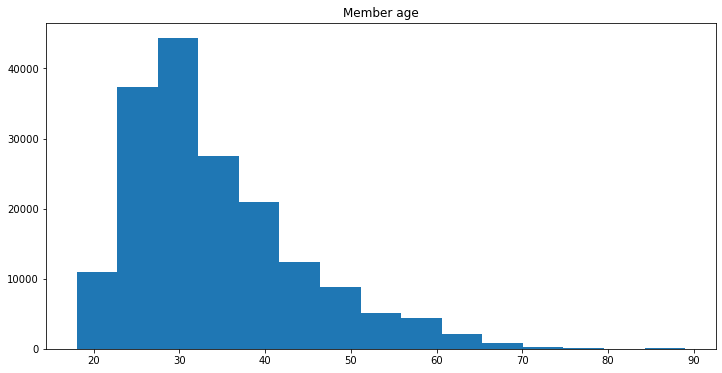

In [319]:
plt.figure(figsize=(12,6))
plt.hist(df['Age'],bins = 15);
plt.title('Member age');

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

- most of bike users are around 30 and the more old age the less users ..

### monthly and weakly and hourly usage of bikes :

In [313]:
# df.strftime('%B %d, %Y, %r') where B for month , d for day , Y for year , r for time
# df['day of week'] = df['date'].dt.strftime('%a')
# df.dt.hour returns the hours of the datetime.
df['start_month']=df['start_time'].dt.strftime('%B')
df['start_Weak_day']=df['start_time'].dt.strftime('%a')
df['start_hour']=df['start_time'].dt.hour
df['day_of_month']=df['start_time'].dt.strftime('%d')

In [311]:
df.start_month.nunique()

1

- so we don't need month visualizing cause it's only one month which is FEB

In [293]:
df.start_Weak_day.nunique()

7

In [294]:
df.start_hour.nunique()

24

- this data name is 201902-fordgobike-tripdata.csv so 02 is for Febrauary and this data is only for Feb all over the month days and times.

In [295]:
# as the start of is Mon day in America and weekends are Sat and Sun
daysofweak=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daysofweak

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

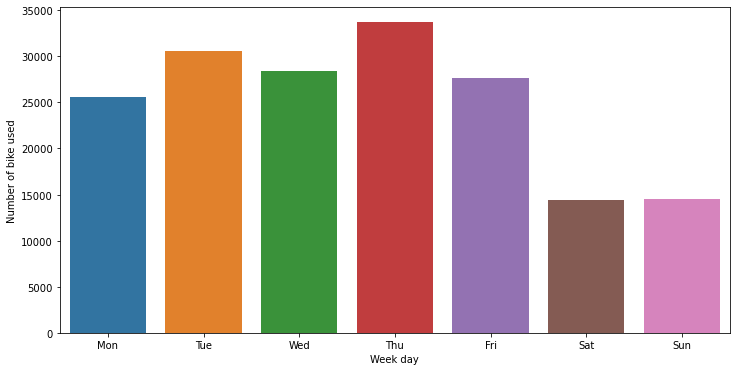

In [303]:
# seaborn.countplot Show the counts of observations in each categorical bin using bars
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_Weak_day',order=daysofweak);
plt.xlabel('Week day');
plt.ylabel('Number of bike used');

- it's max used in Thursday and least at weekend (SAT AND SUN).

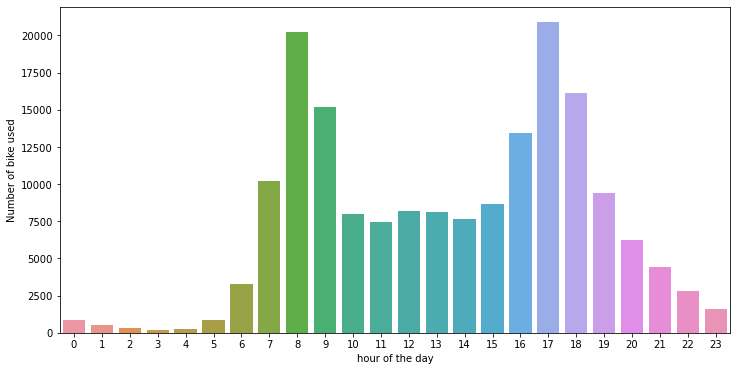

In [310]:
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_hour');
plt.xlabel('hour of the day');
plt.ylabel('Number of bike used');

- it's peak of using is at the early morning at 8 am where people foing to schools and work etc.. and at 5 pm while returing homes ..
- And ofc rarely used at night and early morning and average using is in day time between 8 am and 5 pm.

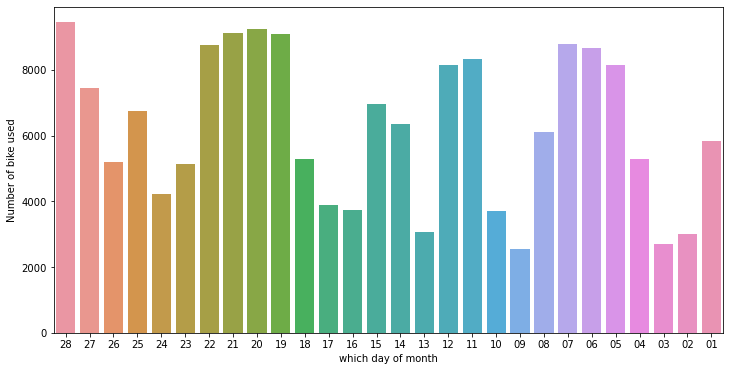

In [315]:
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='day_of_month');
plt.xlabel('which day of month');
plt.ylabel('Number of bike used');

- this proves what we assumed in weakly plotting cause ups and downs repeated every 7 days.

### Gender Discussion :

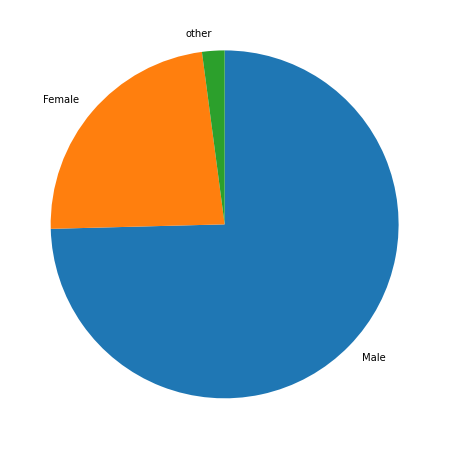

In [332]:
plt.figure(figsize=(8,8))

Gender_counts = df['member_gender'].value_counts()

plt.pie(Gender_counts, labels = ['Male','Female','other'], startangle = 90,
        counterclock = False);


- so most of Bike users are Men and here we can think than because more 

In [304]:
df.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,start_month,start_Weak_day,start_hour
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984.0,Male,No,35.0,February,Thu,17
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,47.0,February,Thu,12
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,1989.0,Other,No,30.0,February,Thu,17
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,45.0,February,Thu,23
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,1959.0,Male,No,60.0,February,Thu,23


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!